In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
# Step 1 - Understanding the dataset
wine = load_wine()
print("The dimensions of the dataset are : ",wine.data.shape)

The dimensions of the dataset are :  (178, 13)


In [6]:
# Step 2 - Converting the data into a dataframe
datadf = pd.DataFrame(wine.data)
datadf.columns = wine.feature_names
target_df = pd.DataFrame(wine.target)

In [37]:
target_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
# Step 3 - Displaying dataframe head

datadf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


-----------------DISTRIBUTION PLOT-----------------


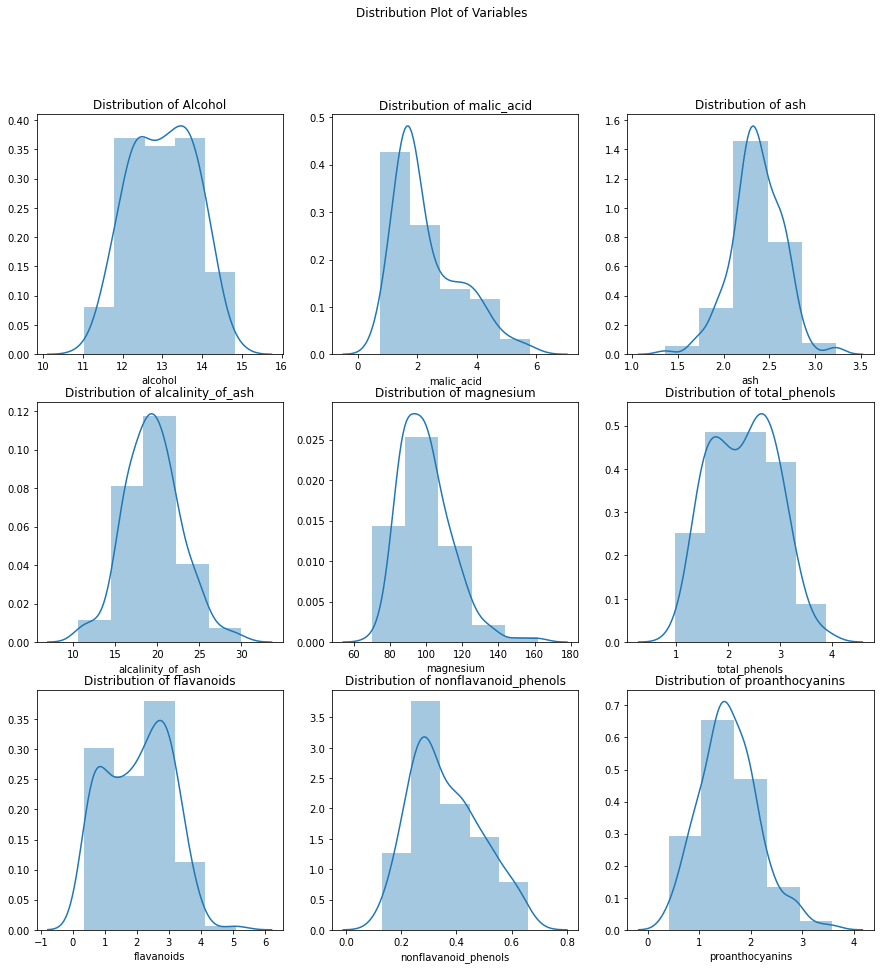

In [12]:
# Step 4 - Creating Distribution plot of variables

print("-----------------DISTRIBUTION PLOT-----------------")
plt.figure(1, figsize=(15,15))
plt.subplot(331)
sns.distplot(datadf["alcohol"], bins = 5).set_title("Distribution of Alcohol")
plt.subplot(332)
sns.distplot(datadf["malic_acid"], bins = 5).set_title("Distribution of malic_acid")
plt.subplot(333)
sns.distplot(datadf["ash"], bins = 5).set_title("Distribution of ash")
plt.subplot(334)
sns.distplot(datadf["alcalinity_of_ash"], bins = 5).set_title("Distribution of alcalinity_of_ash")
plt.subplot(335)
sns.distplot(datadf["magnesium"], bins = 5).set_title("Distribution of magnesium")
plt.subplot(336)
sns.distplot(datadf["total_phenols"], bins = 5).set_title("Distribution of total_phenols")
plt.subplot(337)
sns.distplot(datadf["flavanoids"], bins = 5).set_title("Distribution of flavanoids")
plt.subplot(338)
sns.distplot(datadf["nonflavanoid_phenols"], bins = 5).set_title("Distribution of nonflavanoid_phenols")
plt.subplot(339)
sns.distplot(datadf["proanthocyanins"], bins = 5).set_title("Distribution of proanthocyanins")

plt.suptitle("Distribution Plot of Variables")
plt.show()

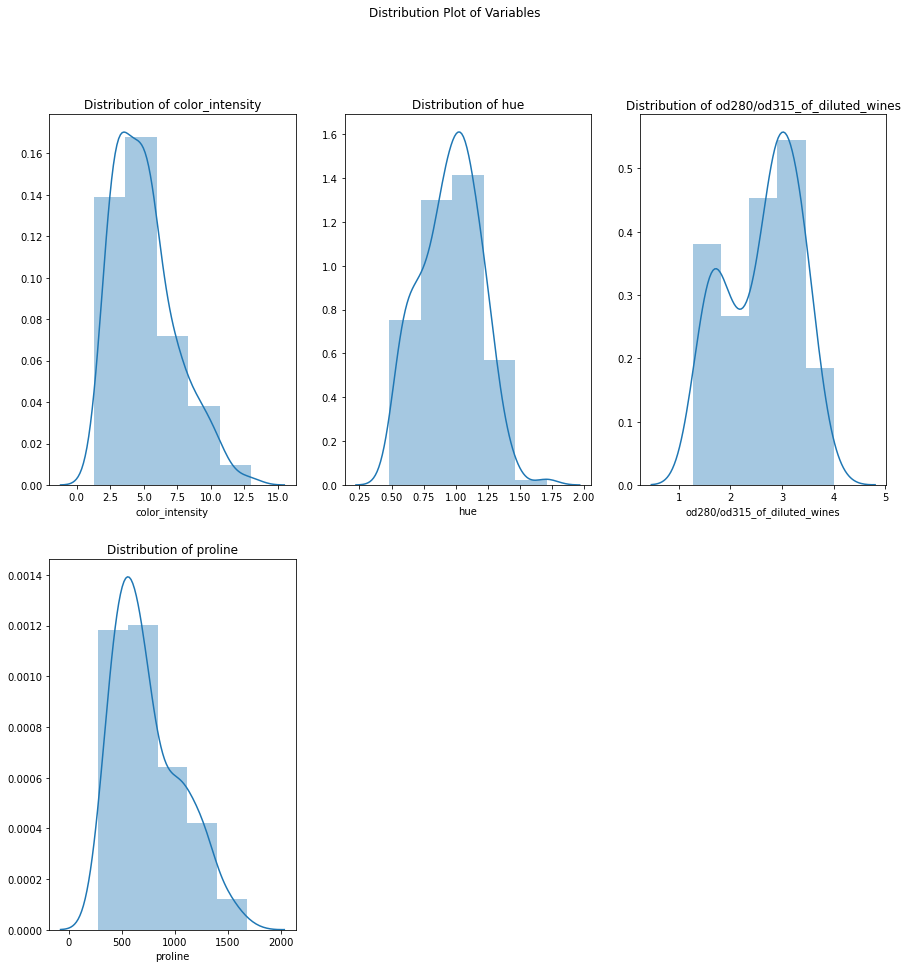

In [16]:
plt.figure(1, figsize=(15,15))
plt.subplot(231)
sns.distplot(datadf["color_intensity"], bins = 5).set_title("Distribution of color_intensity")
plt.subplot(232)
sns.distplot(datadf["hue"], bins = 5).set_title("Distribution of hue")
plt.subplot(233)
sns.distplot(datadf["od280/od315_of_diluted_wines"], bins = 5).set_title("Distribution of od280/od315_of_diluted_wines")
plt.subplot(234)
sns.distplot(datadf["proline"], bins = 5).set_title("Distribution of proline")
plt.suptitle("Distribution Plot of Variables")
plt.show()

-------------------------HEAT MAP-------------------------


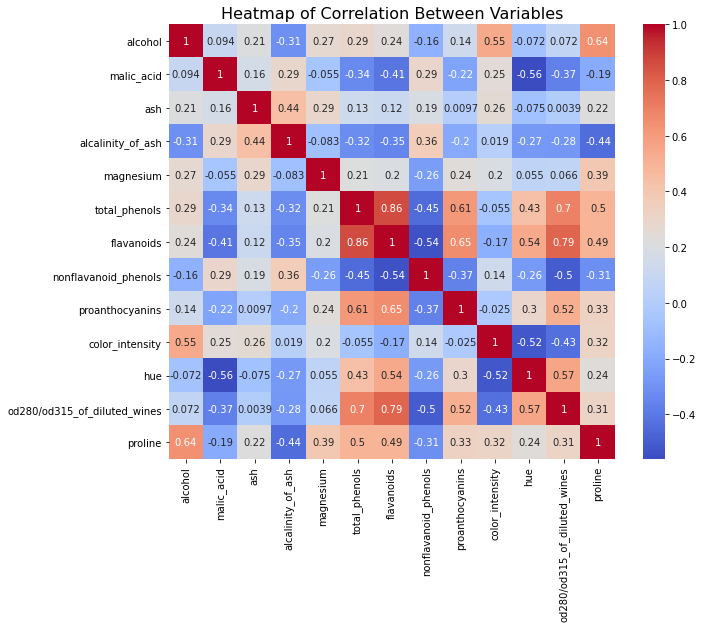

In [18]:
# Step 5 - Creating Heatmap of Correlations

print("-------------------------HEAT MAP-------------------------")
sns.heatmap(datadf.corr(), annot = True, cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title("Heatmap of Correlation Between Variables", fontsize=16)
plt.show()

----------------------------REGRESSION PAIR PLOT----------------------------


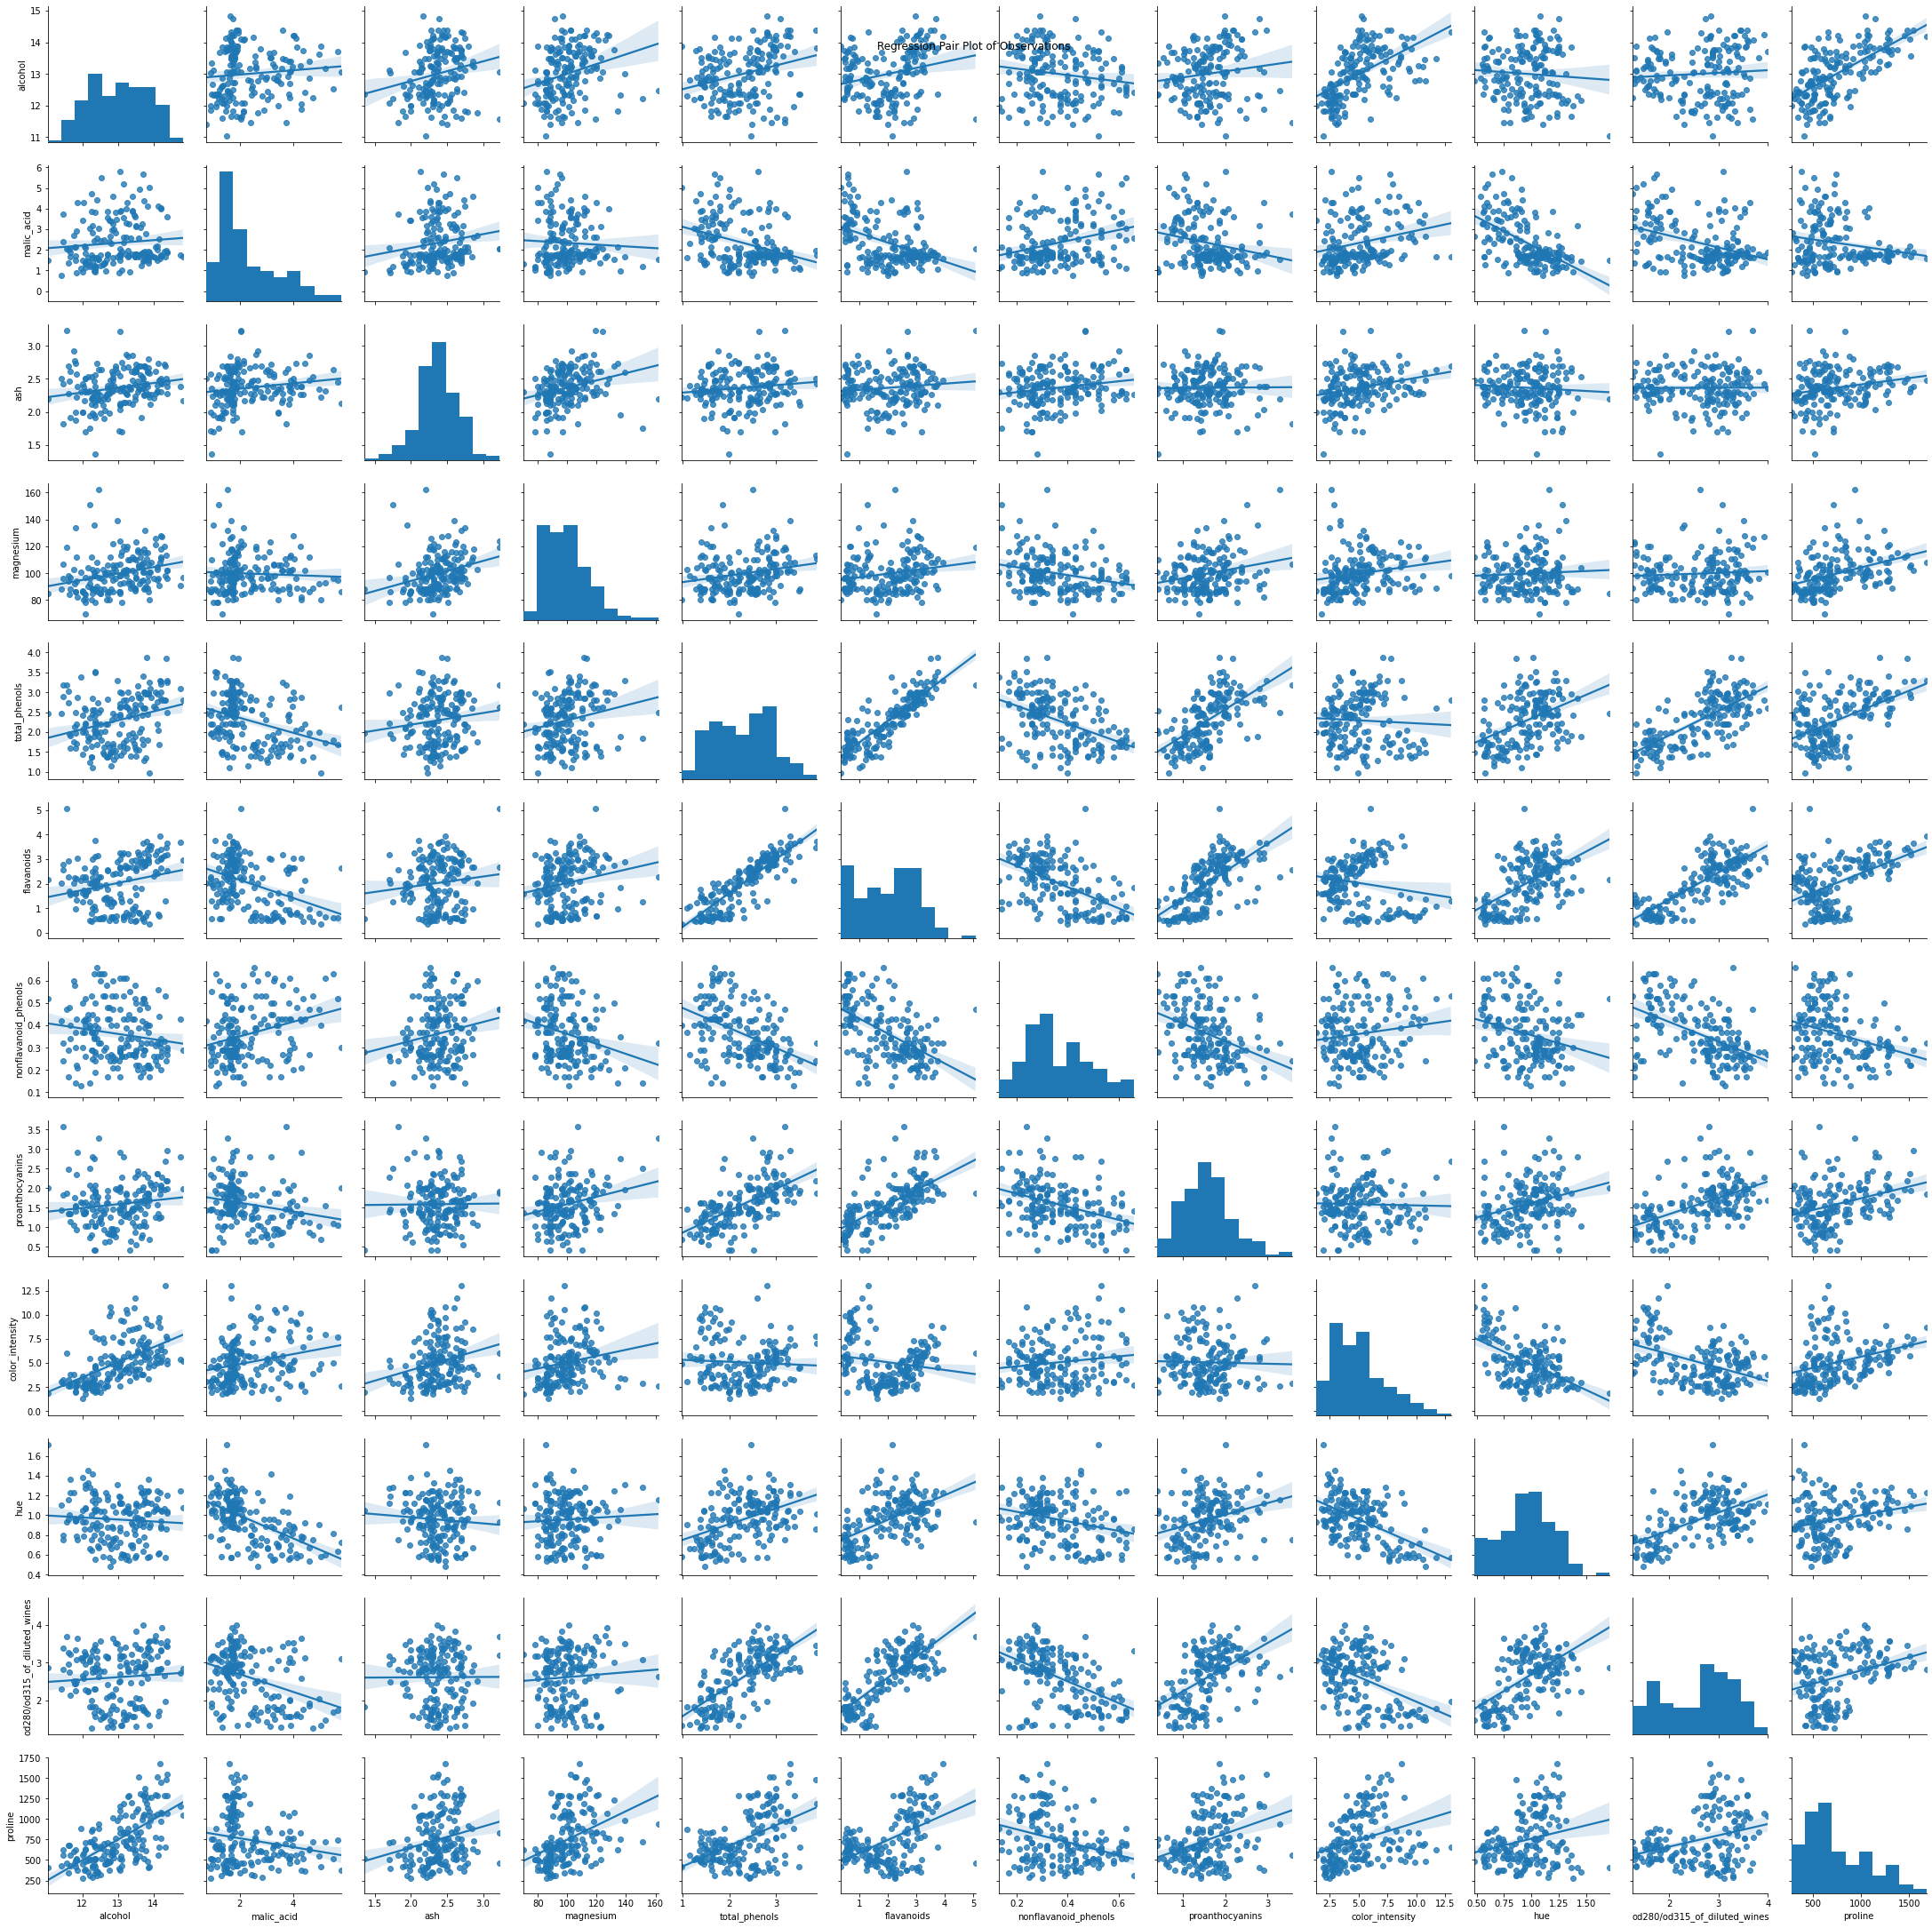

In [19]:
# Step 6 - Regression Pair Plot 
print("----------------------------REGRESSION PAIR PLOT----------------------------")
sns.pairplot(datadf[['alcohol', 'malic_acid', 'ash','magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                    'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']],
             diag_kind="hist", kind='reg')
plt.suptitle("Regression Pair Plot of Observations")
plt.show()

In [24]:
# Step 7 - Checking Missing Values

print("Missing Values :\n", datadf.isnull().sum())

Missing Values :
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [25]:
# Step 8 - Assumptions Check

# Normality Assumptions: Determining Normality of Data

from scipy import stats
print("Skewness of Data \n", stats.skew(datadf))
print("Kurtosis of Data \n", stats.kurtosis(datadf))

Skewness of Data 
 [-0.05104747  1.0308695  -0.17520678  0.21124733  1.08891489  0.08590677
  0.02512948  0.44634901  0.51276903  0.86124805  0.02091312 -0.30468993
  0.76133617]
Kurtosis of Data 
 [-0.8622601   0.25734829  1.07857613  0.44082314  2.01280601 -0.8458573
 -0.88936501 -0.65295221  0.50567101  0.33736976 -0.3680254  -1.08967533
 -0.27499971]


In [30]:
# Step 9 - Determining Outliers by calculating Z-Score
import sys
np.set_printoptions(threshold=sys.maxsize)

zscore = np.abs(stats.zscore(datadf))
print("The Z-Score of the data is \n", zscore)

The Z-Score of the data is 
 [[1.51861254e+00 5.62249798e-01 2.32052541e-01 1.16959318e+00
  1.91390522e+00 8.08997395e-01 1.03481896e+00 6.59563114e-01
  1.22488398e+00 2.51716850e-01 3.62177276e-01 1.84791957e+00
  1.01300893e+00]
 [2.46289627e-01 4.99413378e-01 8.27996323e-01 2.49084714e+00
  1.81450206e-02 5.68647662e-01 7.33628941e-01 8.20719236e-01
  5.44720987e-01 2.93321329e-01 4.06050663e-01 1.11344930e+00
  9.65241521e-01]
 [1.96879028e-01 2.12312463e-02 1.10933436e+00 2.68738198e-01
  8.83583612e-02 8.08997395e-01 1.21553297e+00 4.98406993e-01
  2.13596773e+00 2.69019649e-01 3.18303889e-01 7.88587455e-01
  1.39514818e+00]
 [1.69154964e+00 3.46810643e-01 4.87926405e-01 8.09251184e-01
  9.30918449e-01 2.49144552e+00 1.46652465e+00 9.81875357e-01
  1.03215473e+00 1.18606801e+00 4.27543693e-01 1.18407144e+00
  2.33457383e+00]
 [2.95700226e-01 2.27693770e-01 1.84040254e+00 4.51945783e-01
  1.28198515e+00 8.08997395e-01 6.63351271e-01 2.26795553e-01
  4.01404443e-01 3.19275528e-01

In [31]:
# Step 10 - Determining indexes where Z-score is greater than 3

outlierlist = np.where(zscore>3)
print("The indexes of the outliers are \n", outlierlist[0])
print("The number of outliers is \n", len(outlierlist[0]))

The indexes of the outliers are 
 [ 25  59  69  73  95 110 115 121 121 123 158]
The number of outliers is 
 11


In [33]:
# Step 11 - Feature Extraction
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
datadf = sc.fit_transform(datadf)

In [34]:
# Setting Seed
np.random.seed(1000)

In [36]:
# Step 12 - Creating training, test dataset for dependent and independent variables
X_train, X_test, y_train, y_test = train_test_split(datadf, target_df, random_state = 10)

In [38]:
print("Dimension of training dataset: ", X_train.shape)
print("Dimension of test dataset: ", X_test.shape)

Dimension of training dataset:  (133, 13)
Dimension of test dataset:  (45, 13)


In [39]:
# Step 13 - Creating the Logistic Regression Model
wine_logreg_model = LogisticRegression()

In [42]:
# Step 14 - Fitting the model
wine_logreg_model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [45]:
# Step 15 - Predicting with the trained model and determining the accuracy
pred = wine_logreg_model.predict(X_test)

In [46]:
# Step 16 - Determining the score of training and test dataset
print("Training set score :", wine_logreg_model.score(X_train, y_train))
print("Test set score :", wine_logreg_model.score(X_test, y_test))

Training set score : 1.0
Test set score : 0.9111111111111111


In [47]:
# Step 16 - Determining accuracy of the model using confusion matrix
results = confusion_matrix(y_test, pred)
print("Result of the Confusion Matrix is: \n", results)

Result of the Confusion Matrix is: 
 [[13  0  0]
 [ 1 19  3]
 [ 0  0  9]]
